## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:
        
              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import warnings


import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [3]:
data = get_data(data_path="./motorbike_ambulance_calls.csv")

In [6]:
print("Статистика")
data.describe()

Статистика


,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [7]:
print("Min значення:")
display(data.min())

print("\Max значення:")
display(data.max())

Min значення:


index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

\Max значення:


index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [8]:
print(f"Розмірність: {data.shape}")

Розмірність: (17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [9]:
print("Info:")
data.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [10]:
print("Пропуски:")
data.isnull().sum()

Пропуски:


index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**

***Огляд датасету***

Датасет, що використовується у нашому аналізі, містить **15 колонок** та **17379 рядків**, що забезпечує значний обсяг даних для глибокого дослідження. Основні особливості датасету включають:

- **Категоріальні змінні:** Більшість змінних у датасеті є категоріальними, що потребує їх перетворення для аналізу. Це можна виконати за допомогою методів кодування, таких як One-Hot-Encoding або Label Encoding, для адекватної підготовки до машинного навчання.
  
- **Числові змінні:** Змінні, пов'язані з описом погоди, є чисельними. Ці змінні вимагають аналізу на наявність викидів та можливої нормалізації для забезпечення кращої продуктивності прогностичних моделей.

- **Дата та час:** Колонка з датою потребує конвертації у відповідний формат дати/часу, що дозволить використовувати цю інформацію для часових рядів або інших відповідних аналізів.

- **Відсутність пропусків:** Перевірка датасету виявила, що він не містить пропусків, що є значною перевагою, оскільки уникається потреба у заповненні пропущених даних або видаленні рядків/колонок.

***Рекомендації***

1. **Перекодування категоріальних змінних:** Вибрати оптимальний метод кодування для кожної категоріальної змінної в залежності від моделі, яку буде застосовано.

2. **Нормалізація числових даних:** З урахуванням наявності числових змінних, розглянути можливість їх нормалізації для покращення аналітичних моделей.

3. **Часові змінні:** Виконати конвертацію дат та використати їх для генерації нових змінних, таких як день тижня, час доби тощо.

Ці кроки дозволять максимально ефективно використати доступні дані для подальшого аналізу та машинного навчання, забезпечуючи надійну основу для розробки прогностичних моделей.


**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [14]:
def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
    return df

processed_data = transform_date(data.copy(), 'date')
display(processed_data.head(3))

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [15]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()

    print(f"First day of dataset: {first_day}.\nLast day of dataset: {last_day}")

get_time_limits(processed_data, "date")

First day of dataset: 2011-01-01 00:00:00.
Last day of dataset: 2012-12-31 00:00:00


***Аналіз та перетворення часових даних у датасеті***

**Процес:**
Перетворення колонки з датами з текстового формату 'місяць/день/рік' у тип `datetime` дозволило нам забезпечити коректне використання дат у подальших аналітичних операціях. Це перетворення критично важливе для точного ведення часових рядів та дато-залежних аналізів.

**Результати:**
Після перетворення, ми змогли точно визначити часові межі наших даних:
- **Перший день у датасеті:** це дозволило нам зрозуміти, з якого моменту у нас є записи.
- **Останній день у датасеті:** показує, до якого часу діють наші дані.

Ці дати мають важливе значення для аналізу трендів та патернів у поведінці змінних у часі. Виявилося, що останній день, вказаний у датасеті до перетворення, був некоректно інтерпретований, що могло призвести до помилок у аналізі.

**Висновки та застосування:**
Точне встановлення часових рамок датасету є невід'ємною частиною підготовки даних, особливо коли мова йде про планування маркетингових кампаній, прогнозування запасів, чи будь-яких інших аналітичних завдань, що вимагають часової точності. Переконавшись у правильності часових даних, ми можемо уникнути значних аналітичних помилок та забезпечити відповідність наших висновків реальному стану справ.

Цей підхід не лише виправляє потенційні помилки інтерпретації часових даних, але й забезпечує міцну основу для надійного аналізу даних.


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [17]:
data_categorical = processed_data.drop(["index", "date", "temp", "atemp", "hum", "windspeed"], axis="columns")
display(data_categorical.head(10))

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,spring,0,1,0,0,6,0,1,16
1,spring,0,1,1,0,6,0,1,40
2,spring,0,1,2,0,6,0,1,32
3,spring,0,1,3,0,6,0,1,13
4,spring,0,1,4,0,6,0,1,1
5,spring,0,1,5,0,6,0,2,1
6,spring,0,1,6,0,6,0,1,2
7,spring,0,1,7,0,6,0,1,3
8,spring,0,1,8,0,6,0,1,8
9,spring,0,1,9,0,6,0,1,14


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [18]:
def season_encode(df: pd.DataFrame, season_col_name: str):
    season_map = {
        "spring": 1,
        "summer": 2,
        "autumn": 3,
        "winter": 4
    }
    df[season_col_name] = df[season_col_name].map(season_map)
    return df

data_categorical = season_encode(data_categorical.copy(), "season")

display(data_categorical.head(3))

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,0,6,0,1,16
1,1,0,1,1,0,6,0,1,40
2,1,0,1,2,0,6,0,1,32


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

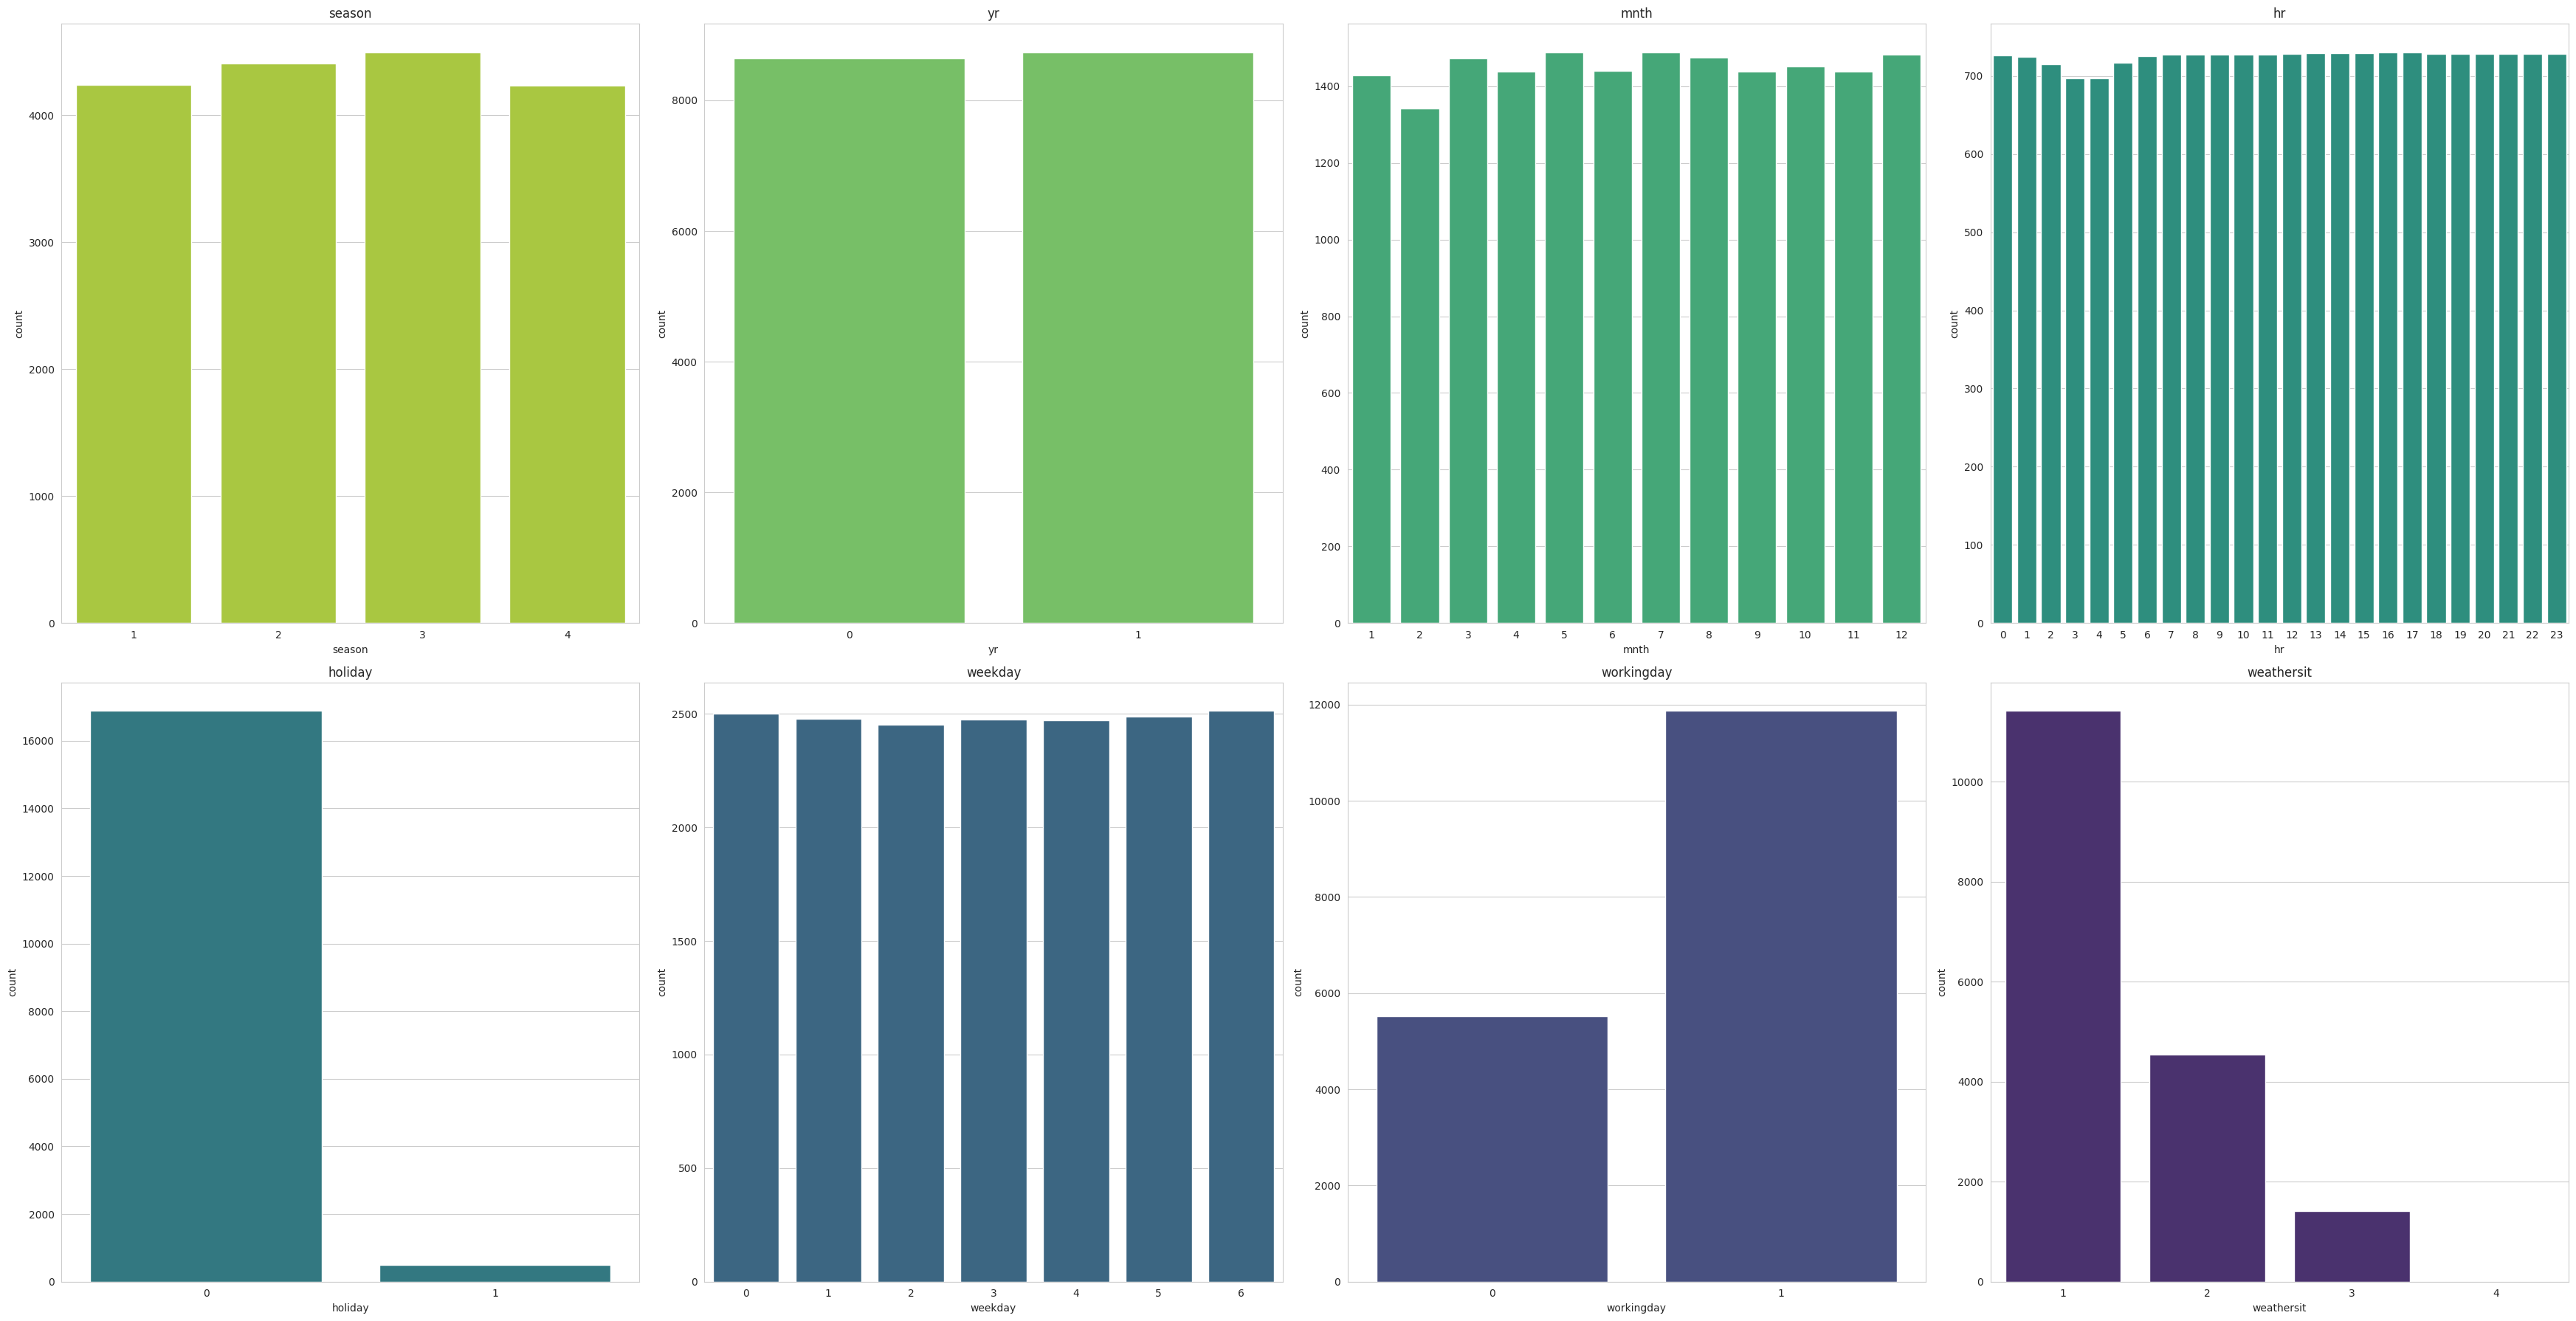

In [19]:
fig, ax = plt.subplots(2, 4, figsize=(35, 18))

palette = sns.color_palette("viridis", 8)

for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    if variable != "cnt":
        sns.countplot(data=data_categorical, x=variable, ax=subplot, color=palette.pop())
        subplot.set_title(variable)

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**

***Висновки з завдань 5-7: Аналіз категоріальних змінних***

- **Змінні**: У датасеті виділено вісім категоріальних атрибутів: `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`. Ці атрибути включають булеві змінні та змінні із обмеженою кількістю категорій.

- **Кодування змінної season**: Змінна `season` була закодована значеннями від 1 до 4, що відповідають порам року. Це дозволяє використовувати цей атрибут у машинному навчанні.

- **Аналіз за кожною категорією**:
  - **Season**: Сезонні записи майже рівномірно розподілені, але осінь має дещо більшу кількість записів.
  - **Year (Rok)**: Вища кількість даних зареєстрована у 2012 році порівняно з 2011.
  - **Month (Misjac)**: Розподіл даних по місяцях показує мінімальне зменшення у лютому.
  - **Hour (Godyna)**: Рівномірний розподіл протягом дня з винятком нічних годин (1-4 ранку), де спостерігається зниження.
  - **Holiday**: Набагато менше даних зареєстровано під час святкових днів.
  - **Weekday**: Майже рівномірний розподіл по днях тижня.
  - **Workingday**: Більша кількість даних зареєстрована у робочі дні.
  - **Weathersit**: Більшість записів припадає на дні з найкращими погодними умовами.

***Загальний висновок:***
Аналіз показав, що датасет має добре збалансовану представленість даних за більшістю категорій, що сприяє ефективному навчанню моделей. Категоріальні змінні, такі як `season` та `weathersit`, можуть мати значний вплив на моделі через їх прямий зв'язок із зовнішніми умовами, які впливають на поведінку користувачів або явища, що моделюються.


#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [20]:
numerical_data = processed_data[["temp", "atemp", "hum", "windspeed", "cnt"]]
display(numerical_data.head(10))

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16
1,0.22,0.2727,0.80,0.0000,40
2,0.22,0.2727,0.80,0.0000,32
3,0.24,0.2879,0.75,0.0000,13
4,0.24,0.2879,0.75,0.0000,1
5,0.24,0.2576,0.75,0.0896,1
6,0.22,0.2727,0.80,0.0000,2
7,0.20,0.2576,0.86,0.0000,3
8,0.24,0.2879,0.75,0.0000,8
9,0.32,0.3485,0.76,0.0000,14


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

Distribution skewness for temp: -0.01, indicating a balanced tail.
Distribution skewness for atemp: -0.09, indicating a balanced tail.
Distribution skewness for hum: -0.11, indicating a left-leaning tail.
Distribution skewness for windspeed: 0.57, indicating a right-leaning tail.


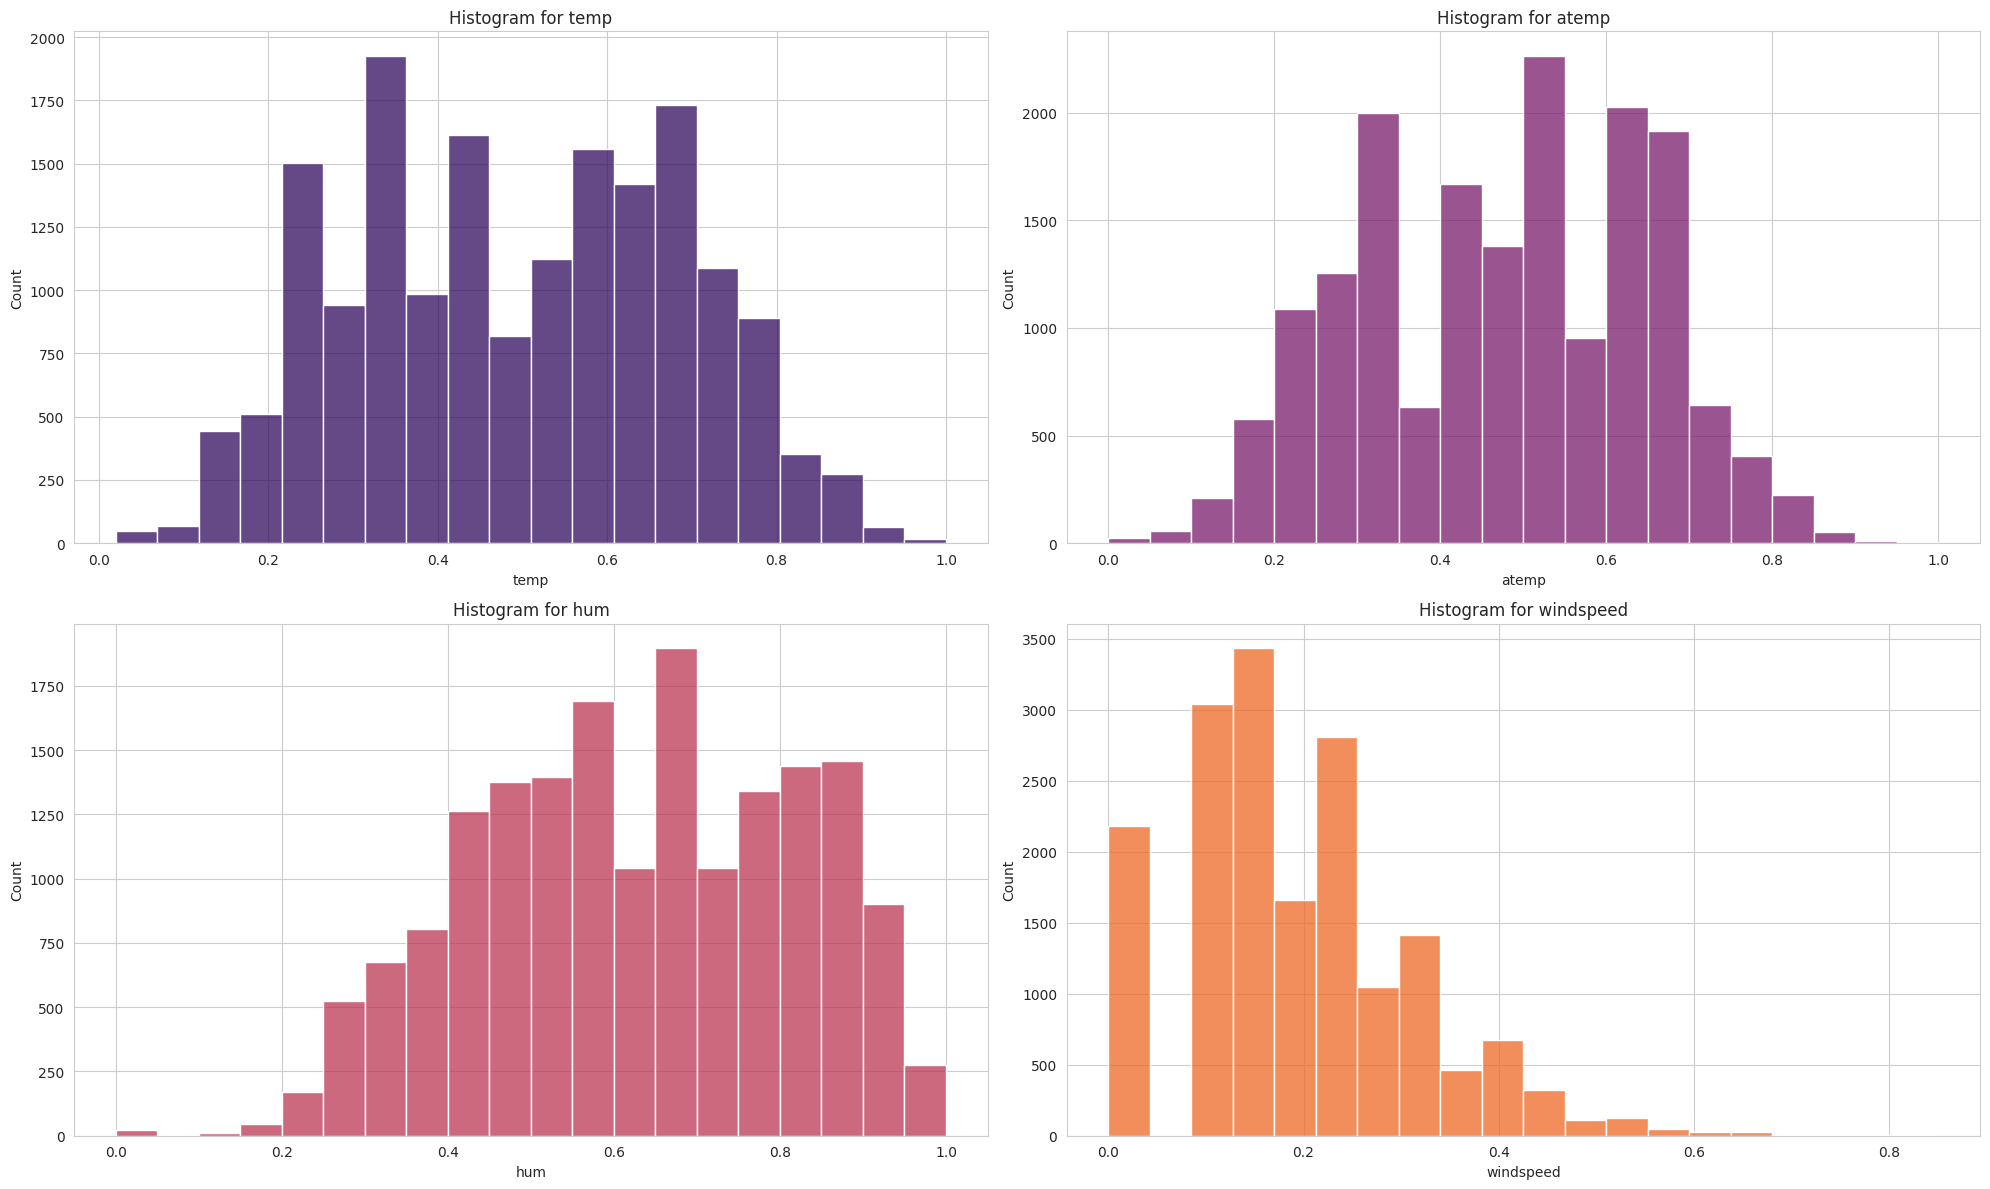

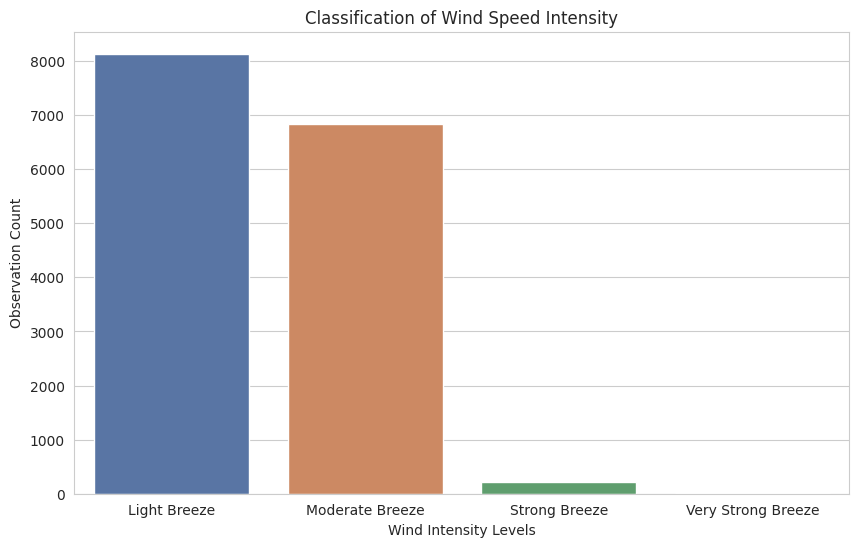

In [22]:
def analyze_distribution_skewness(dataset, feature):
    skewness_metric = dataset[feature].skew()
    tail_description = "right-leaning" if skewness_metric > 0.1 else "left-leaning" if skewness_metric < -0.1 else "balanced"
    print(f"Distribution skewness for {feature}: {skewness_metric:.2f}, indicating a {tail_description} tail.")

plot_grid, plot_axes = plt.subplots(2, 2, figsize=(20, 12), tight_layout=True)
palette_choices = sns.color_palette("inferno", len(numerical_data.columns))

for data_column, axis, color in zip(numerical_data.columns, plot_axes.flatten(), palette_choices):
    if data_column != "cnt":
        sns.histplot(numerical_data[data_column], bins=20, ax=axis, color=color)
        axis.set_title(f"Histogram for {data_column}")
        analyze_distribution_skewness(numerical_data, data_column)

plt.show()

wind_thresholds = [0.0, 0.2, 0.5, 0.8, 1.0]
wind_labels = ["Light Breeze", "Moderate Breeze", "Strong Breeze", "Very Strong Breeze"]

data_categorical["Wind_Intensity"] = pd.cut(processed_data["windspeed"], bins=wind_thresholds, labels=wind_labels)

intensity_figure, intensity_axis = plt.subplots(figsize=(10, 6))
sns.countplot(x="Wind_Intensity", data=data_categorical, palette="deep")
intensity_axis.set_title("Classification of Wind Speed Intensity")
intensity_axis.set_xlabel("Wind Intensity Levels")
intensity_axis.set_ylabel("Observation Count")

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

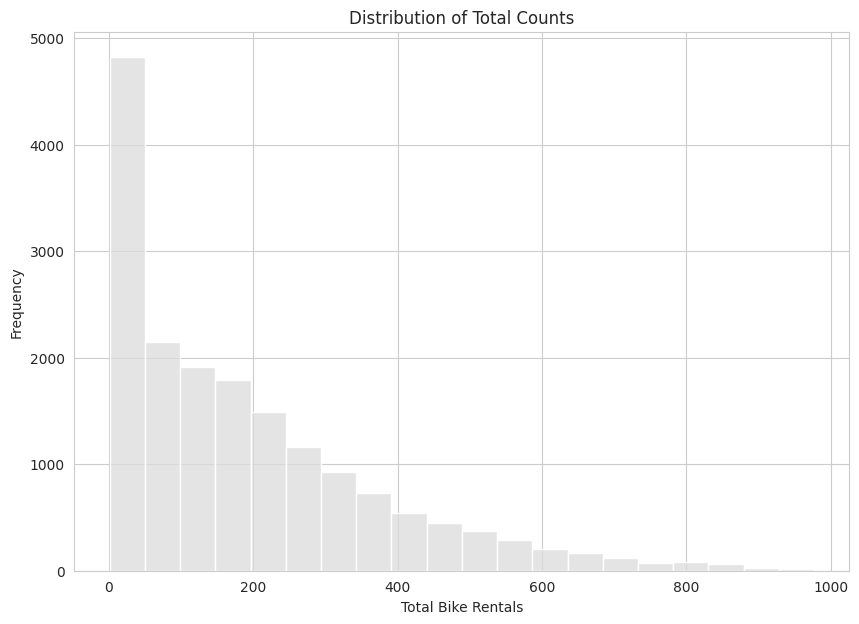

Skewness: 1.28. The distribution has a right-leaning tail.


In [23]:
target_distribution_figure, target_distribution_axis = plt.subplots(figsize=(10, 7))

color_for_histogram = sns.color_palette("coolwarm", n_colors=1)

sns.histplot(data=processed_data, x="cnt", bins=20, ax=target_distribution_axis, color=color_for_histogram[0])
target_distribution_axis.set_title("Distribution of Total Counts")
target_distribution_axis.set_xlabel("Total Bike Rentals")
target_distribution_axis.set_ylabel("Frequency")

plt.show()

target_skewness = processed_data["cnt"].skew()
skew_description = "right-leaning" if target_skewness > 0 else "left-leaning" if target_skewness < 0 else "balanced"
print(f"Skewness: {target_skewness:.2f}. The distribution has a {skew_description} tail.")

**Висновки з 8-10 завдання (детальні)**

***Висновки з завдань 8-10: Аналіз числових змінних***

- **Числові змінні**: В датасеті виділені наступні числові змінні: `temp`, `atemp`, `hum`, `windspeed`, `cnt`. Змінна `cnt` є цільовою і представляє кількість викликів.

- **Аналіз числових змінних**:
  - **temp**: Бімодальний розподіл, що може вказувати на різні погодні умови в різні періоди року. Має відносно симетричний розподіл.
  - **atemp**: Мультимодальний розподіл, показує відчуття температури людьми, що може відрізнятись залежно від індивідуальних особливостей сприйняття.
  - **hum**: Розподіл майже рівномірний з легким лівим нахилом, що вказує на рівномірне розподілення вологості протягом року.
  - **windspeed**: Експоненційний розподіл із переважанням днів зі слабким вітром, що є типовим для багатьох кліматичних зон.

- **Графік цільової змінної (`cnt`)**:
  - Графік показує, що більшість днів має низьку кількість викликів, зі збільшенням до декількох піків, що може вказувати на пікові дні або особливі події.
  - Є значний правий нахил, що вказує на викиди в дні з дуже великою кількістю викликів.

- **Категоризація швидкості вітру**:
  - З категорізації швидкості вітру визначено, що більшість днів має слабкий або помірний вітер, з незначною кількістю днів зі сильним вітром.
  - Ця інформація може бути корисною для моделювання залежності між вітром і кількістю викликів.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

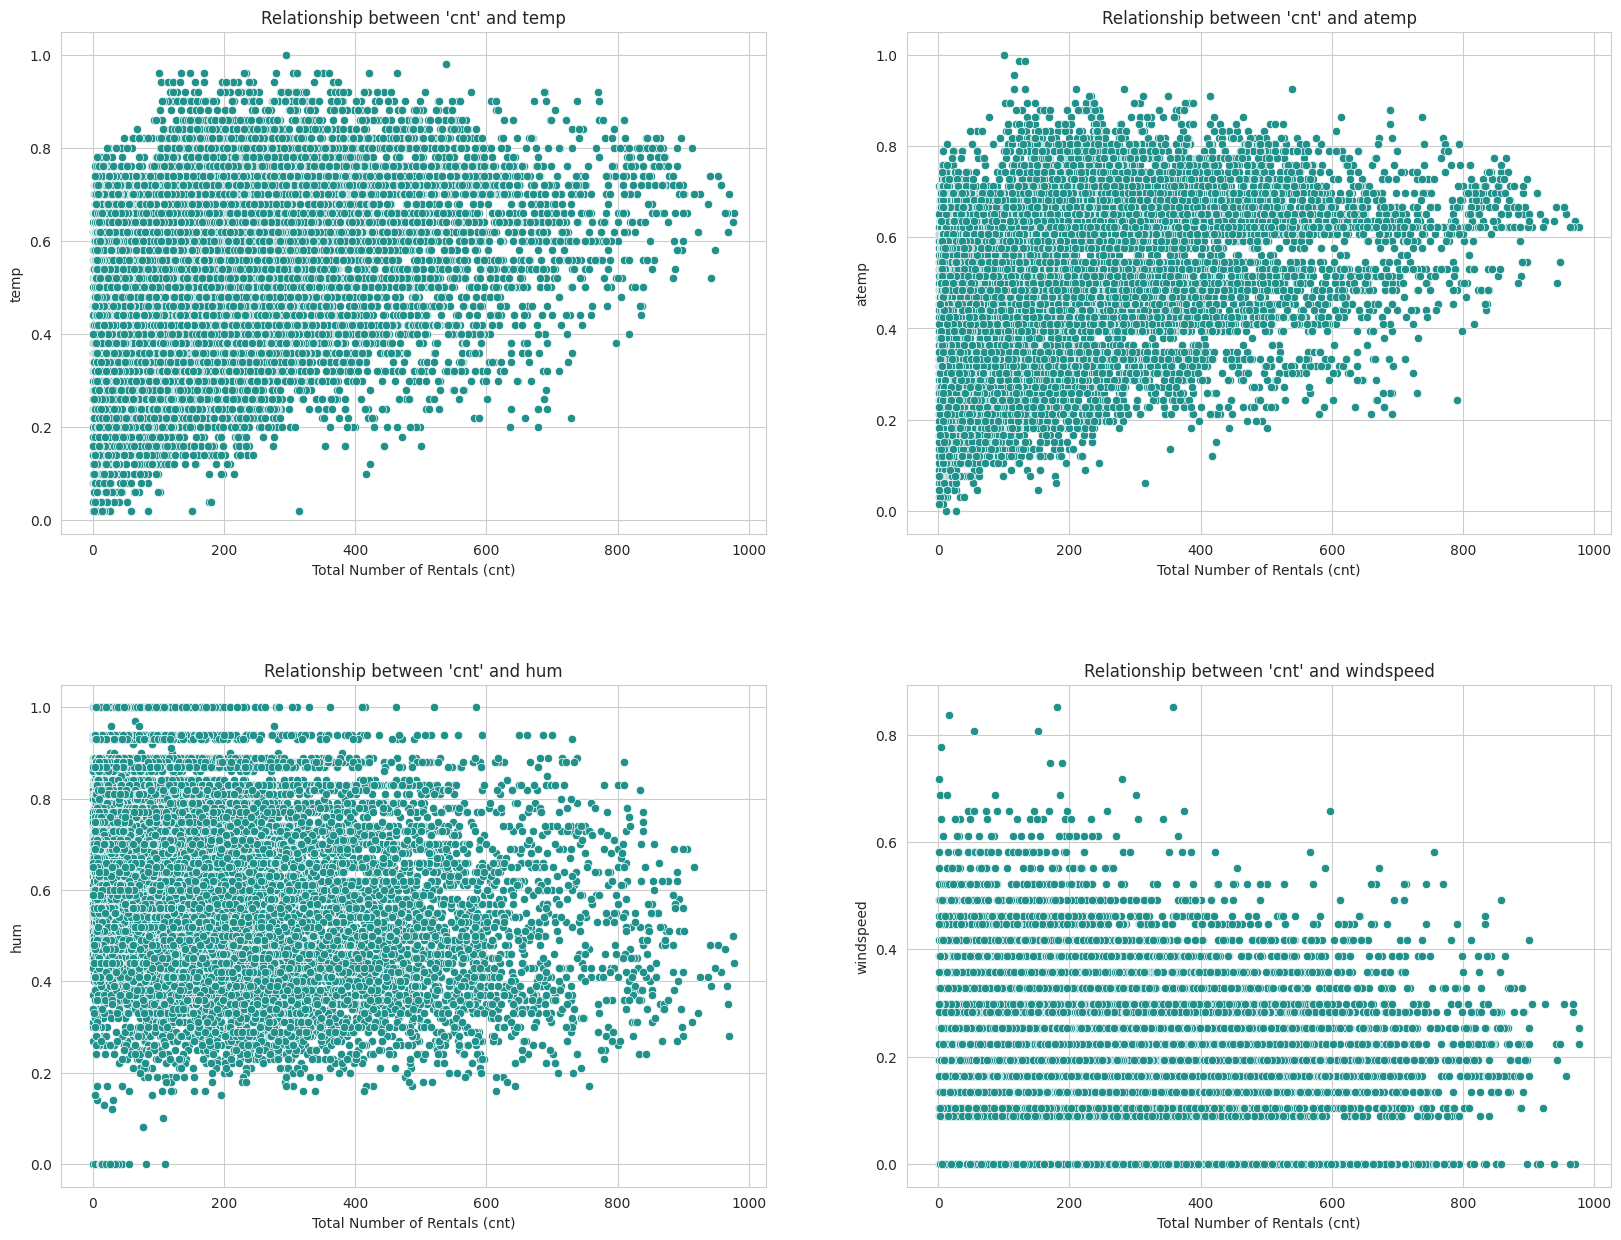

In [24]:
relationship_figure, relationship_axes = plt.subplots(2, 2, figsize=(20, 15))
relationship_figure.subplots_adjust(hspace=0.3)

custom_color = sns.color_palette("viridis", n_colors=1)

for feature, plot_axis in zip(numerical_data.columns.drop('cnt'), relationship_axes.flatten()):
    sns.scatterplot(x=numerical_data['cnt'], y=numerical_data[feature], ax=plot_axis, color=custom_color[0])
    plot_axis.set_title(f"Relationship between 'cnt' and {feature}")
    plot_axis.set_xlabel('Total Number of Rentals (cnt)')
    plot_axis.set_ylabel(f'{feature}')

plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

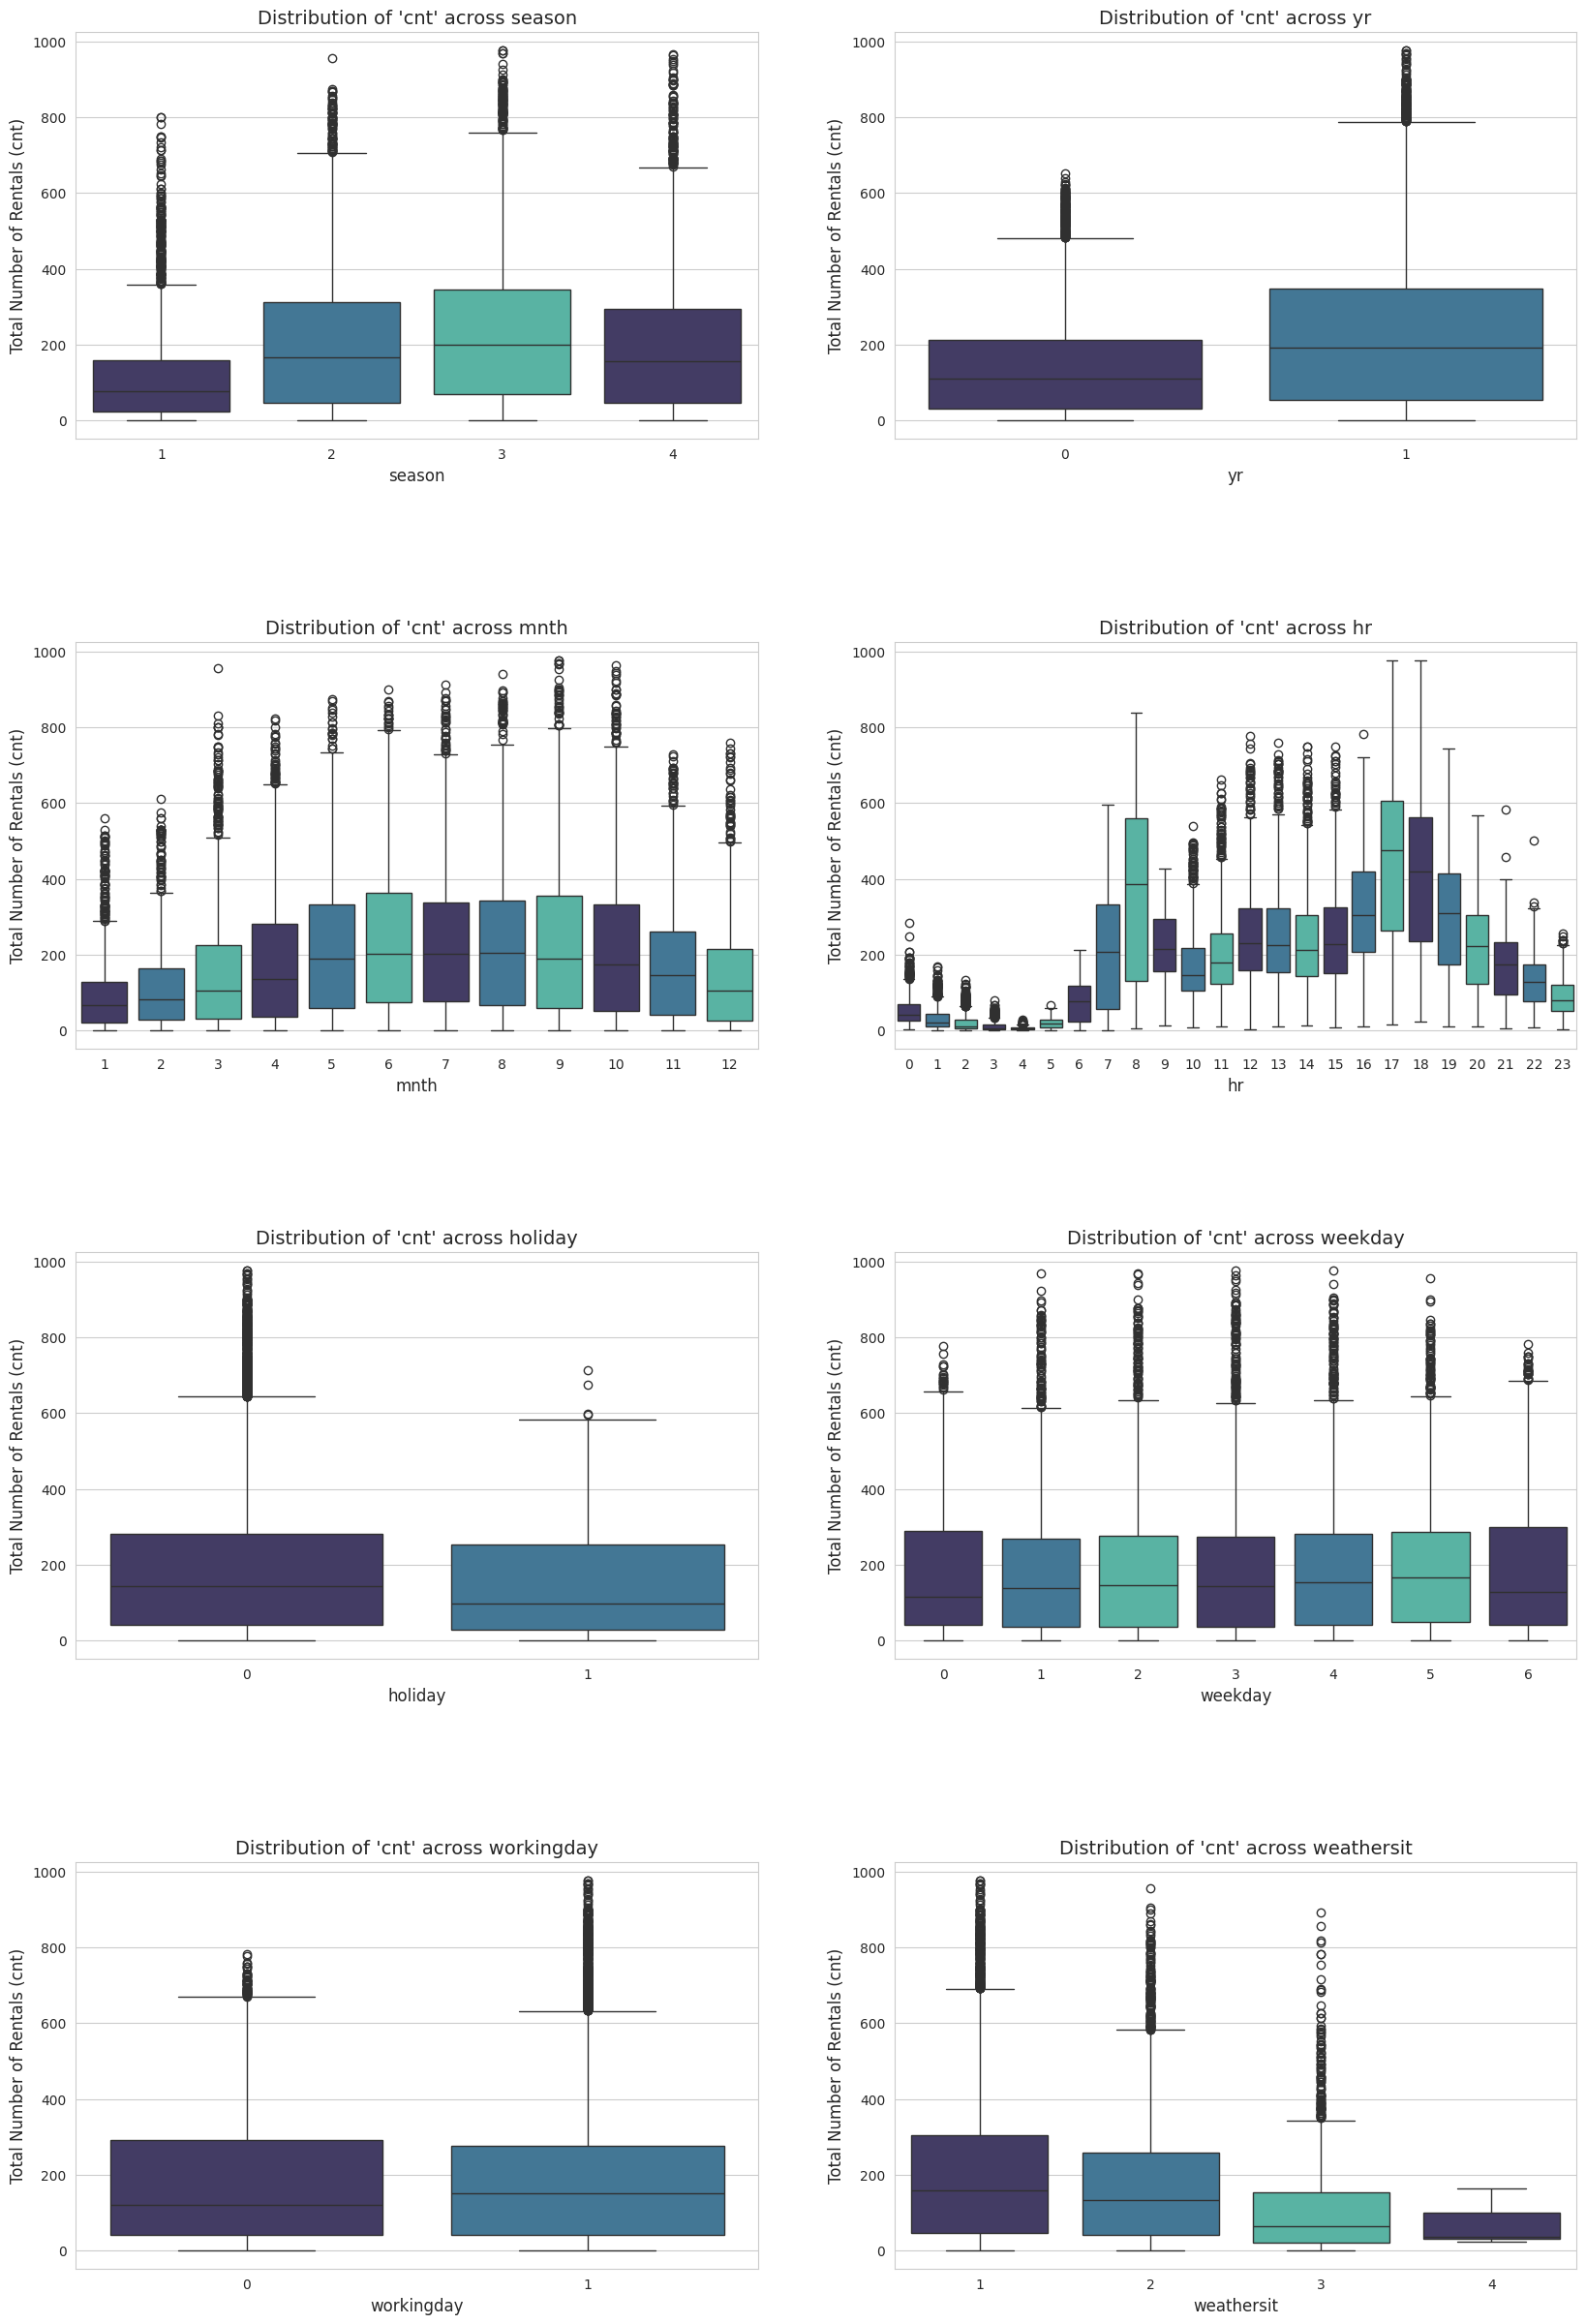

In [25]:
category_relationship_figure, category_relationship_axes = plt.subplots(4, 2, figsize=(20, 30))
category_relationship_figure.subplots_adjust(hspace=0.5)
custom_palette = sns.color_palette("mako", n_colors=3)

for feature, plot_axis in zip(data_categorical.columns, category_relationship_axes.flatten()):
    sns.boxplot(x=data_categorical[feature], y=data_categorical['cnt'], ax=plot_axis, palette=custom_palette)
    plot_axis.set_title(f"Distribution of 'cnt' across {feature}", fontsize=14)
    plot_axis.set_xlabel(feature, fontsize=12)
    plot_axis.set_ylabel('Total Number of Rentals (cnt)', fontsize=12)

plt.show()

**Висновки з 11-12 завдання (детальні)**

**Висновки з завдань 11-12: Аналіз числових та категоріальних змінних**
***Графіки Scatterplot:***
- **temp & cnt** та **atemp & cnt**: Є певний лінійний зв'язок між температурою та кількістю викликів, де зі збільшенням температури зростає кількість викликів. Зв'язок помірний, що буде перевірено через коефіцієнти кореляції. На графіках також помітні викиди.
- **humidity & cnt** та **windspeed & cnt**: Відсутність сильної залежності між цими змінними та кількістю викликів. Зі збільшенням вологості кількість викликів зменшується, але швидкість вітру не показує лінійної залежності. Зв'язок буде також перевірений через кореляцію.

***Графіки Boxplot:***
- Кожен графік містить велику кількість викидів, що може бути пов'язано з особливостями датасету, а не обов'язково з аномаліями.
- Особливих тенденцій між сезонами та кількістю викликів немає, але можна побачити залежність між кількістю викликів та часом доби. Найбільша активність викликів спостерігається вранці (7-8 година) та ввечері (17-18 година), з послабленням після 19:00 та мінімумом о 4:00 ранку.


**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

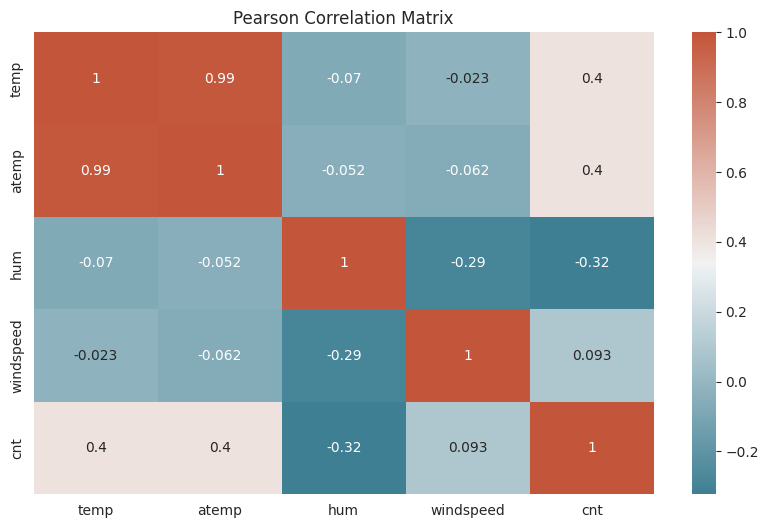

Pearson correlation coefficients with 'cnt':
temp         0.404772
atemp        0.400929
hum         -0.322911
windspeed    0.093234
cnt          1.000000
Name: cnt, dtype: float64


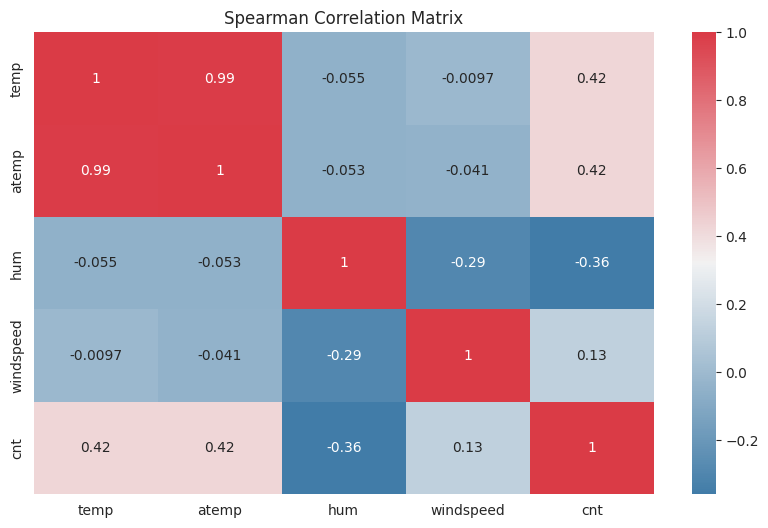

Spearman correlation coefficients with 'cnt':
temp         0.423330
atemp        0.423258
hum         -0.359614
windspeed    0.126629
cnt          1.000000
Name: cnt, dtype: float64


In [26]:
pearson_corr = numerical_data.corr(method='pearson')
fig_pearson, ax_pearson = plt.subplots(figsize=(10, 6))
color_map_pearson = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(pearson_corr, annot=True, cmap=color_map_pearson, ax=ax_pearson, annot_kws={'size': 10})
ax_pearson.tick_params(labelsize=10)
ax_pearson.xaxis.set_label_position('top')
ax_pearson.set_title('Pearson Correlation Matrix')

plt.show()

print("Pearson correlation coefficients with 'cnt':")
print(pearson_corr["cnt"].head(10))

spearman_corr = numerical_data.corr(method='spearman')
fig_spearman, ax_spearman = plt.subplots(figsize=(10, 6))
color_map_spearman = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(spearman_corr, annot=True, cmap=color_map_spearman, ax=ax_spearman, annot_kws={'size': 10})
ax_spearman.tick_params(labelsize=10)
ax_spearman.xaxis.set_label_position('top')
ax_spearman.set_title('Spearman Correlation Matrix')

plt.show()

print("Spearman correlation coefficients with 'cnt':")
print(spearman_corr["cnt"].head(10))

***Висновки з завдання 13***

**Відмінності між методами Пірсона та Спірмана:**
- Метод **Пірсона** вимірює лінійний зв'язок між двома змінними, оцінюючи, наскільки змінна $X$ зростає чи зменшується зі зміною змінної $Y$.
- Метод **Спірмана** оцінює монотонний зв'язок, де більш важливо напрямок, а не точна лінійна залежність. Він корисний при наявності не лінійних залежностей чи категоріальних даних.

**Зв'язки між змінними:**
- Значення коефіцієнтів кореляції вказують на помірну залежність між змінними **temp**, **atemp** і **cnt**, як за методом Пірсона, так і Спірмана. Ці зв'язки були видимі і на розсіяних графіках.
- Велика колінеарність між **temp** та **atemp** свідчить про наявність мультиколінеарності, що може впливати на точність моделей машинного навчання.

**Методи кореляції:**
- Обидва методи кореляції підтверджують існування зв'язків, але спірманівський метод часто виявляє більш широкий спектр залежностей, особливо в нелінійних даних, де традиційний підхід Пірсона може недооцінювати ці зв'язки.


**Завдання 14**
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

MSE Train: 10448.098, Test: 10101.710
R^2 Train: 0.688, Test: 0.680


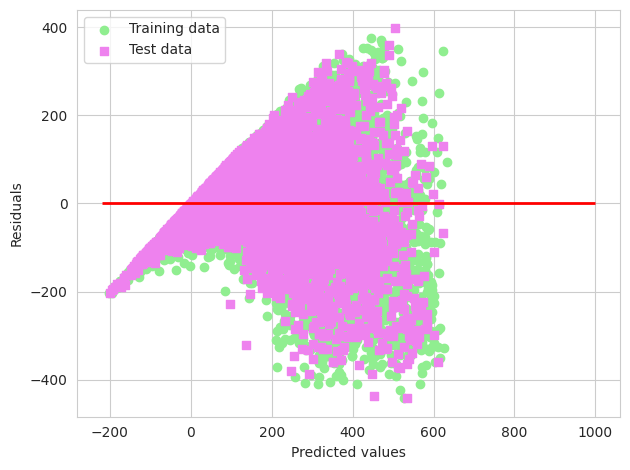

In [29]:
def prepare_features(dataset):
    expanded_data = pd.concat([
        dataset,
        pd.get_dummies(dataset['season'], prefix='season'),
        pd.get_dummies(dataset['yr'], prefix='year'),
        pd.get_dummies(dataset['mnth'], prefix='month'),
        pd.get_dummies(dataset['hr'], prefix='hour'),
        pd.get_dummies(dataset['holiday'], prefix='holiday_status'),
        pd.get_dummies(dataset['weekday'], prefix='weekday'),
        pd.get_dummies(dataset['workingday'], prefix='working_day_status'),
        pd.get_dummies(dataset['weathersit'], prefix='weather_condition'),
    ], axis=1)

    columns_to_remove = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
    expanded_data.drop(columns_to_remove, axis=1, inplace=True)

    return expanded_data

enriched_data = prepare_features(data)

enriched_data['night_hours'] = (data['hr'] > 21) | (data['hr'] < 6)

model_features = enriched_data.drop([
    'season_spring', 'year_1', 'month_4', 'hour_0', 'holiday_status_0',
    'weekday_0', 'working_day_status_1', 'weather_condition_1', 'atemp', 'date'
], axis=1)

def split_data(features, target_column, test_ratio):
    X = features.drop(target_column, axis="columns")
    y = features[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(model_features, 'cnt', 0.3)

def fit_regression_model(X, y):
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    return linear_model

# Training the model
regression_model = fit_regression_model(X_train, y_train)

# Predicting and evaluating the model
y_train_predicted = regression_model.predict(X_train)
y_test_predicted = regression_model.predict(X_test)

# model performance
print(f"MSE Train: {mean_squared_error(y_train, y_train_predicted):.3f}, Test: {mean_squared_error(y_test, y_test_predicted):.3f}")
print(f"R^2 Train: {r2_score(y_train, y_train_predicted):.3f}, Test: {r2_score(y_test, y_test_predicted):.3f}")

plt.scatter(y_train_predicted, y_train_predicted - y_train, c='lightgreen', marker='o', label='Training data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, c='violet', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, color='red', lw=2)
plt.tight_layout()
plt.show()

# Висновки з завдання 14 (Детальні)

## Огляд процесу

Ми створили фіктивні змінні для всіх категоріальних (season, yr, mnth, hr, holiday, weekday, workingday, weathersit) атрибутів, які тепер виступають як фічі моделі. Таргетом для прогнозування виступає змінна `cnt`. З кожної категорії було вилучено одну змінну для уникнення даммі-перемінної, а також були видалені змінні `atemp` та `date`.

Додатково, введено нову фічу `night_time`, яка базується на знайденій залежності між часом дня та кількістю викликів.

## Результати моделі

Модель була навчена з використанням фіч, де X — наші фічі, а Y — таргет `cnt`. Навчання моделі показало, що коефіцієнт детермінації R² становить 0.688, що означає, що модель коректно прогнозує `cnt` у 68.8% випадків.

Розрахунки MSE для тренувальної та тестової вибірок показують незначну різницю, що свідчить про те, що модель не перенавчена. Проте, невелика величина MSE свідчить про невисоку точність прогнозування моделі.

## Аналіз залишків

З графіка залишків моделі множинної регресії видно, що між даними присутня значна помилка та вони мають нелінійний зв'язок, що може вказувати на необхідність подальшого доопрацювання моделі або використання інших типів регресійних моделей.

## Загальний висновок

Результати моделі та аналіз залишків підтверджують, що для точнішого прогнозування може знадобитися включення додаткових змінних або вибір альтернативного підходу до аналізу даних.
